## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [28]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ


In [39]:
train, test = keras.datasets.cifar10.load_data()

In [42]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    # 將資料透過min-max正規化至-1~1之間
    # 公式為 (x-x's mean)/(x's max - x's min)
    x = (x - np.mean(x)) / (x.max() - x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [43]:
x_train, y_train = train
x_test, y_test = test
print(x_train.shape)

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

print(x_train.shape)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

(50000, 32, 32, 3)
(50000, 3072)


In [44]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8, 4, 2]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0829 14:00:37.282909  4728 deprecation.py:323] From D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 14:00:37.367918  4728 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 209us/step - loss: 2.2143 - acc: 0.2036 - val_loss: 2.1562 - val_acc: 0.2503
Epoch 2/100
50000/50000 [==============================] - 7s 139us/step - loss: 2.0808 - acc: 0.2740 - val_loss: 2.0120 - val_acc: 0.2934
Epoch 3/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.9518 - acc: 0.3244 - val_loss: 1.9059 - val_acc: 0.3224
Epoch 4/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.8482 - acc: 0.3440 - val_loss: 1.8310 - val_acc: 0.3466
Epoch 5/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.7538 - acc: 0.3679 - val_loss: 1.7848 - val_acc: 0.3725
Epoch 6/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.6685 - acc: 0.3950 - val_loss: 1.7262 - val_acc: 0.3860
Epoch 7/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.5937 - acc: 0.4227 - val_loss: 1

50000/50000 [==============================] - 7s 143us/step - loss: 0.4000 - acc: 0.8585 - val_loss: 3.2753 - val_acc: 0.4882
Epoch 60/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.4376 - acc: 0.8470 - val_loss: 3.3099 - val_acc: 0.4788
Epoch 61/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.4192 - acc: 0.8543 - val_loss: 3.3222 - val_acc: 0.4871
Epoch 62/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.4018 - acc: 0.8585 - val_loss: 3.4097 - val_acc: 0.4777
Epoch 63/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.3591 - acc: 0.8753 - val_loss: 3.3442 - val_acc: 0.4853
Epoch 64/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.4084 - acc: 0.8593 - val_loss: 3.3334 - val_acc: 0.4855
Epoch 65/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.4179 - acc: 0.8570 - val_loss: 3.4133 - val_acc: 0.4887
Epoch 66/100
50000/50000 [=======

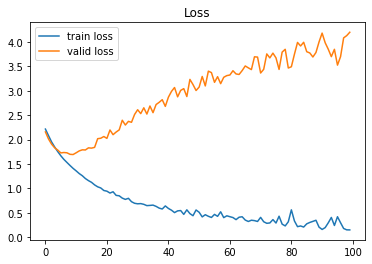

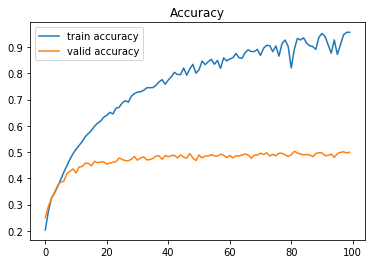

In [49]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()